In [6498]:
!pip3 install category_encoders

In [6499]:
!pip3 install xgboost

In [6500]:
!pip3 install scipy

In [6501]:
!pip3 install imbalanced-learn

In [6502]:
'''import libraries'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.metrics import recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [6503]:
'''Load CSVs'''
energia_2021 = pd.read_csv('./datasets/energia_202109-202112.csv')
energia_2022 = pd.read_csv('./datasets/energia_202201-202212.csv')
#meteo_2021 = pd.read_csv('./datasets/meteo_202109-202112.csv')
#meteo_2022 = pd.read_csv('./datasets/meteo_202201-202212.csv')
meteo = pd.read_csv('./datasets/meteo_2021_2022.csv')


teste_energia = pd.read_csv('./datasets/energia_202301-202304.csv')
teste_meteo = pd.read_csv('./datasets/meteo_2023.csv')


## Análise dos Dados

#### Full Join dos datasets

In [6504]:
energia_21 = energia_2021.copy()
energia_22 = energia_2022.copy() 
energia = pd.merge(energia_21, energia_22, how="outer", on=['Data', 'Hora','Normal (kWh)','Horário Económico (kWh)','Autoconsumo (kWh)','Injeção na rede (kWh)'])

In [6505]:
#meteo_21 = meteo_2021.copy()
#meteo_22 = meteo_2022.copy() 
#meteo = pd.merge(meteo_21, meteo_22, how="outer", on=['dt','dt_iso','city_name','temp', 'feels_like', 'temp_min', 'temp_max' , 'pressure', 'sea_level', 'grnd_level', 'humidity', 'wind_speed', 'rain_1h', 'clouds_all', 'weather_description'])

### Join dos datasets Energia e Meteorologia

#### Treino

In [6506]:
energia['Data_Hora'] = energia['Data'] + ":" + energia['Hora'].astype(str)
energia['dt'] = energia['Data_Hora'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d:%H').timestamp()).astype('int64')

In [6507]:
e_m = pd.merge(meteo, energia, how="inner", on= 'dt')

In [6508]:
e_m.tail()

,dt,temp,humidity,dew_point,feels_like,rain_1h,sea_level,grnd_level,clouds_all,evapotranspiration,...,direct_radiation_instant,direct_normal_irradiance_instant,weather_description,Data,Hora,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh),Data_Hora
11011,1672513200,13.4,89,11.6,10.7,2.0,1018.4,995.3,100,0.01,...,0.0,0.0,light rain,2022-12-31,19,1.693,0.000,0.0,NaN,2022-12-31:19
11012,1672516800,13.5,92,12.2,10.8,3.6,1018.8,995.7,100,0.01,...,0.0,0.0,moderate rain,2022-12-31,20,1.327,0.000,0.0,NaN,2022-12-31:20
11013,1672520400,13.3,93,12.2,11.1,2.8,1019.0,995.9,100,0.00,...,0.0,0.0,moderate rain,2022-12-31,21,0.757,0.000,0.0,NaN,2022-12-31:21
11014,1672524000,13.2,93,12.2,11.4,4.4,1019.0,995.9,100,0.00,...,0.0,0.0,moderate rain,2022-12-31,22,0.000,0.675,0.0,NaN,2022-12-31:22
11015,1672527600,13.2,93,12.2,11.4,4.6,1018.8,995.7,100,0.00,...,0.0,0.0,moderate rain,2022-12-31,23,0.000,0.403,0.0,NaN,2022-12-31:23


#### Teste

In [6509]:
teste_energia['Data_Hora'] = teste_energia['Data'] + ":" + teste_energia['Hora'].astype(str)
teste_energia['dt'] = teste_energia['Data_Hora'].apply(lambda x: pd.to_datetime(x,format='%Y-%m-%d:%H').timestamp()).astype('int64')

In [6510]:
teste = pd.merge(teste_meteo, teste_energia, how="inner", on= 'dt')

In [6511]:
#for i in teste_meteo.columns:
    #sns.displot(teste_meteo, x=i, kde=True)

In [6512]:
#teste_meteo.describe()

### Análise

#### Treino

In [6513]:
e_m.isnull().sum() # 7777 None na coluna Injeção na rede (kWh)

dt                                     0
temp                                   0
humidity                               0
dew_point                              0
feels_like                             0
rain_1h                                0
sea_level                              0
grnd_level                             0
clouds_all                             0
evapotranspiration                     0
vapour_pressure_deficit (kPa)          0
wind_speed                             0
wind_direction                         0
wind_gusts                             0
soil_temperature                       0
soil_moisture                          0
is_day                                 0
sunshine_duration (s)                  0
direct_radiation_instant               0
direct_normal_irradiance_instant       0
weather_description                    0
Data                                   0
Hora                                   0
Normal (kWh)                           0
Horário Económic

In [6514]:
e_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dt                                11016 non-null  int64  
 1   temp                              11016 non-null  float64
 2   humidity                          11016 non-null  int64  
 3   dew_point                         11016 non-null  float64
 4   feels_like                        11016 non-null  float64
 5   rain_1h                           11016 non-null  float64
 6   sea_level                         11016 non-null  float64
 7   grnd_level                        11016 non-null  float64
 8   clouds_all                        11016 non-null  int64  
 9   evapotranspiration                11016 non-null  float64
 10  vapour_pressure_deficit (kPa)     11016 non-null  float64
 11  wind_speed                        11016 non-null  float64
 12  wind

#### Teste

In [6515]:
teste.isnull().sum()

dt                                  0
temp                                0
humidity                            0
dew_point                           0
feels_like                          0
rain_1h                             0
sea_level                           0
grnd_level                          0
clouds_all                          0
evapotranspiration                  0
vapour_pressure_deficit (kPa)       0
wind_speed                          0
wind_direction                      0
wind_gusts                          0
soil_temperature                    0
soil_moisture                       0
is_day                              0
sunshine_duration (s)               0
direct_radiation_instant            0
direct_normal_irradiance_instant    0
weather_description                 0
Data                                0
Hora                                0
Normal (kWh)                        0
Horário Económico (kWh)             0
Autoconsumo (kWh)                   0
Data_Hora   

In [6516]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2256 entries, 0 to 2255
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dt                                2256 non-null   int64  
 1   temp                              2256 non-null   float64
 2   humidity                          2256 non-null   int64  
 3   dew_point                         2256 non-null   float64
 4   feels_like                        2256 non-null   float64
 5   rain_1h                           2256 non-null   float64
 6   sea_level                         2256 non-null   float64
 7   grnd_level                        2256 non-null   float64
 8   clouds_all                        2256 non-null   int64  
 9   evapotranspiration                2256 non-null   float64
 10  vapour_pressure_deficit (kPa)     2256 non-null   float64
 11  wind_speed                        2256 non-null   float64
 12  wind_d

## Tratamento dos Dados

### Simplificação dos nomes das features

In [6517]:
e_m.rename(columns={"dt": "Timestamp"}, inplace=True)
e_m.rename(columns={"temp": "Temperatura"}, inplace=True)
e_m.rename(columns={"dew_point": "Ponto de Orvalho"}, inplace=True)
e_m.rename(columns={"feels_like": "Sensação Térmica"}, inplace=True)
e_m.rename(columns={"humidity": "Humidade"}, inplace=True)
e_m.rename(columns={"wind_speed": "Velocidade Vento"}, inplace=True)
e_m.rename(columns={"rain_1h": "Precipitação Média"}, inplace=True)
e_m.rename(columns={"sea_level": "Pressão Mar"}, inplace=True)
e_m.rename(columns={"grnd_level": "Pressão Local"}, inplace=True)
e_m.rename(columns={"clouds_all": "Nebulosidade"}, inplace=True)
e_m.rename(columns={"evapotranspiration": "Evapotranspiração"}, inplace=True)
e_m.rename(columns={"vapour_pressure_deficit (kPa)": "Déficit de Vapor"}, inplace=True)
e_m.rename(columns={"wind_direction": "Direção Vento"}, inplace=True)
e_m.rename(columns={"wind_gusts": "Rajadas Vento"}, inplace=True)
e_m.rename(columns={"soil_temperature": "Temperatura Solo"}, inplace=True)
e_m.rename(columns={"soil_moisture": "Humidade Solo"}, inplace=True)
e_m.rename(columns={"is_day": "é_de_Dia"}, inplace=True)
e_m.rename(columns={"sunshine_duration (s)": "Duração Solar"}, inplace=True)
e_m.rename(columns={"direct_radiation_instant": "Radiação Solar"}, inplace=True)
e_m.rename(columns={"direct_normal_irradiance_instant": "Irradiância Solar"}, inplace=True)
e_m.rename(columns={"weather_description": "Estado do Tempo"}, inplace=True)
e_m.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
e_m.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
e_m.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
e_m.rename(columns={"Injeção na rede (kWh)": "Injeção na Rede"}, inplace=True)

In [6518]:
teste.rename(columns={"dt": "Timestamp"}, inplace=True)
teste.rename(columns={"temp": "Temperatura"}, inplace=True)
teste.rename(columns={"dew_point": "Ponto de Orvalho"}, inplace=True)
teste.rename(columns={"feels_like": "Sensação Térmica"}, inplace=True)
teste.rename(columns={"humidity": "Humidade"}, inplace=True)
teste.rename(columns={"wind_speed": "Velocidade Vento"}, inplace=True)
teste.rename(columns={"rain_1h": "Precipitação Média"}, inplace=True)
teste.rename(columns={"sea_level": "Pressão Mar"}, inplace=True)
teste.rename(columns={"grnd_level": "Pressão Local"}, inplace=True)
teste.rename(columns={"clouds_all": "Nebulosidade"}, inplace=True)
teste.rename(columns={"evapotranspiration": "Evapotranspiração"}, inplace=True)
teste.rename(columns={"vapour_pressure_deficit (kPa)": "Déficit de Vapor"}, inplace=True)
teste.rename(columns={"wind_direction": "Direção Vento"}, inplace=True)
teste.rename(columns={"wind_gusts": "Rajadas Vento"}, inplace=True)
teste.rename(columns={"soil_temperature": "Temperatura Solo"}, inplace=True)
teste.rename(columns={"soil_moisture": "Humidade Solo"}, inplace=True)
teste.rename(columns={"is_day": "é_de_Dia"}, inplace=True)
teste.rename(columns={"sunshine_duration (s)": "Duração Solar"}, inplace=True)
teste.rename(columns={"direct_radiation_instant": "Radiação Solar"}, inplace=True)
teste.rename(columns={"direct_normal_irradiance_instant": "Irradiância Solar"}, inplace=True)
teste.rename(columns={"weather_description": "Estado do Tempo"}, inplace=True)
teste.rename(columns={"Normal (kWh)": "Normal"}, inplace=True)
teste.rename(columns={"Horário Económico (kWh)": "Horário Económico"}, inplace=True)
teste.rename(columns={"Autoconsumo (kWh)": "Autoconsumo"}, inplace=True)
teste.rename(columns={"Injeção na rede (kWh)": "Injeção na Rede"}, inplace=True)

### Remoção de features

In [6519]:
#e_m.drop(['city_name','sea_level','grnd_level'], axis=1, inplace=True)
#teste.drop(['city_name','sea_level','grnd_level'], axis=1, inplace=True)
#e_m.drop(['Data_Hora','dt_iso'], axis=1, inplace=True)
#teste.drop(['Data_Hora','dt_iso'], axis=1, inplace=True)

In [6520]:
e_m.drop(['Data_Hora'], axis=1, inplace=True)
teste.drop(['Data_Hora'], axis=1, inplace=True)

### Alteração de datas

#### Adicionar colunas a partir da data - Feature Engineering

Converter o tipo de dados da coluna 'timestamp' para datetime

In [6524]:
e_m['Data'] = pd.to_datetime(e_m['Data'], format='%Y-%m-%d', errors='coerce')
assert e_m['Data'].isnull().sum() == 0, 'missing Data'
e_m['Data'].head()

0   2021-09-29
1   2021-09-29
2   2021-09-29
3   2021-09-29
4   2021-09-29
Name: Data, dtype: datetime64[ns]

In [6525]:
teste['Data'] = pd.to_datetime(teste['Data'], format='%Y-%m-%d', errors='coerce')
assert teste['Data'].isnull().sum() == 0, 'missing Data'
teste['Data'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Data, dtype: datetime64[ns]

Criação de várias colunas com as partes extraídas da Data

In [6526]:
e_m['Ano'] = e_m['Data'].dt.year 
e_m['Mês'] = e_m['Data'].dt.month 
e_m['Dia'] = e_m['Data'].dt.day
e_m.head()

,Timestamp,Temperatura,Humidade,Ponto de Orvalho,Sensação Térmica,Precipitação Média,Pressão Mar,Pressão Local,Nebulosidade,Evapotranspiração,...,Estado do Tempo,Data,Hora,Normal,Horário Económico,Autoconsumo,Injeção na Rede,Ano,Mês,Dia
0,1632873600,11.5,91,10.0,10.1,0.0,1027.9,1004.4,23,0.0,...,few clouds,2021-09-29,0,0.0,0.0,0.0,NaN,2021,9,29
1,1632877200,11.2,90,9.7,10.2,0.0,1027.9,1004.4,22,0.0,...,few clouds,2021-09-29,1,0.0,0.0,0.0,NaN,2021,9,29
2,1632880800,11.1,90,9.5,10.0,0.0,1027.8,1004.3,23,0.0,...,few clouds,2021-09-29,2,0.0,0.0,0.0,NaN,2021,9,29
3,1632884400,10.8,90,9.2,9.6,0.0,1027.6,1004.1,14,0.0,...,few clouds,2021-09-29,3,0.0,0.0,0.0,NaN,2021,9,29
4,1632888000,10.7,90,9.0,9.5,0.0,1027.8,1004.3,11,0.0,...,few clouds,2021-09-29,4,0.0,0.0,0.0,NaN,2021,9,29


In [6527]:
teste['Ano'] = teste['Data'].dt.year 
teste['Mês'] = teste['Data'].dt.month 
teste['Dia'] = teste['Data'].dt.day
teste.head()

,Timestamp,Temperatura,Humidade,Ponto de Orvalho,Sensação Térmica,Precipitação Média,Pressão Mar,Pressão Local,Nebulosidade,Evapotranspiração,...,Irradiância Solar,Estado do Tempo,Data,Hora,Normal,Horário Económico,Autoconsumo,Ano,Mês,Dia
0,1672531200,12.7,95,11.9,11.9,3.7,1019.0,995.8,100,0.00,...,0.0,moderate rain,2023-01-01,0,0.0,0.467,0.0,2023,1,1
1,1672534800,12.6,93,11.5,11.4,5.7,1018.1,994.9,100,0.00,...,0.0,moderate rain,2023-01-01,1,0.0,0.577,0.0,2023,1,1
2,1672538400,12.7,92,11.4,11.8,8.7,1016.8,993.7,100,0.00,...,0.0,heavy intensity rain,2023-01-01,2,0.0,0.346,0.0,2023,1,1
3,1672542000,13.1,91,11.6,11.8,10.2,1016.2,993.1,100,0.00,...,0.0,heavy intensity rain,2023-01-01,3,0.0,0.270,0.0,2023,1,1
4,1672545600,13.7,87,11.6,10.5,2.6,1015.3,992.3,100,0.02,...,0.0,moderate rain,2023-01-01,4,0.0,0.252,0.0,2023,1,1


In [6531]:
e_m.drop(['Data','Ano'], axis=1, inplace=True)

In [6532]:
teste.drop(['Data','Ano'], axis=1, inplace=True)

### Converter tipos de dados categóricos para numéricos

#### Injeção na Rede

In [6534]:
lb_make = LabelEncoder()
e_m['Injeção na Rede'] = lb_make.fit_transform(e_m['Injeção na Rede'])

In [6535]:
e_m['Injeção na Rede'].unique()

array([4, 1, 2, 0, 3])

#### Estado do Tempo

In [6538]:
lb_make = LabelEncoder()
e_m['Estado do Tempo'] = lb_make.fit_transform(e_m['Estado do Tempo'])

In [6539]:
lb_make = LabelEncoder()
teste['Estado do Tempo'] = lb_make.fit_transform(teste['Estado do Tempo'])

### Normalização

In [6540]:
from sklearn import preprocessing

In [6541]:
e_m.describe()

,Timestamp,Temperatura,Humidade,Ponto de Orvalho,Sensação Térmica,Precipitação Média,Pressão Mar,Pressão Local,Nebulosidade,Evapotranspiração,...,Radiação Solar,Irradiância Solar,Estado do Tempo,Hora,Normal,Horário Económico,Autoconsumo,Injeção na Rede,Mês,Dia
count,1.101600e+04,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,...,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000,11016.000000
mean,1.652701e+09,14.639651,77.110839,10.212473,13.688008,0.215786,1018.590151,995.558696,42.597767,0.107196,...,111.948475,204.480973,3.225490,11.500000,0.202278,0.159714,0.117314,3.227487,7.433551,15.803922
std,1.144868e+07,6.177826,16.557869,4.906007,7.475109,0.824957,6.199122,5.931816,40.426023,0.160311,...,199.224159,305.032450,2.404487,6.922501,0.349478,0.271792,0.176762,1.346130,3.578335,8.835905
min,1.632874e+09,-1.400000,23.000000,-7.400000,-4.600000,0.000000,994.500000,971.700000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.642787e+09,10.600000,66.000000,6.900000,8.600000,0.000000,1014.900000,992.100000,2.000000,0.000000,...,0.000000,0.000000,1.000000,5.750000,0.000000,0.000000,0.000000,3.000000,4.000000,8.000000
50%,1.652701e+09,14.200000,81.000000,10.600000,13.000000,0.000000,1018.400000,995.500000,30.000000,0.030000,...,0.000000,0.000000,2.000000,11.500000,0.000000,0.000000,0.000000,4.000000,8.000000,16.000000
75%,1.662614e+09,17.900000,91.000000,14.000000,18.100000,0.000000,1022.700000,999.500000,91.000000,0.160000,...,142.925000,409.550000,6.000000,17.250000,0.314000,0.288000,0.227000,4.000000,11.000000,23.000000
max,1.672528e+09,38.500000,100.000000,22.500000,41.100000,16.800000,1033.900000,1010.200000,100.000000,0.790000,...,866.600000,962.000000,7.000000,23.000000,3.251000,6.978000,1.192000,4.000000,12.000000,31.000000


In [6542]:
from scipy.stats import zscore

In [6543]:
#numeric_cols = e_m.select_dtypes(include=[np.number]).columns
#e_m[numeric_cols].apply(zscore)

In [6544]:
#numeric_cols = teste.select_dtypes(include=[np.number]).columns
#teste[numeric_cols].apply(zscore)

In [6545]:
#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#e_m[['Timestamp']] = min_max_scaler.fit_transform(e_m[['Timestamp']])
#e_m[['Temperatura']] = min_max_scaler.fit_transform(e_m[['Temperatura']])
#e_m[['Sensação Térmica']] = min_max_scaler.fit_transform(e_m[['Sensação Térmica']])
#e_m[['Temperatura Mínima']] = min_max_scaler.fit_transform(e_m[['Temperatura Mínima']])
#e_m[['Temperatura Máxima']] = min_max_scaler.fit_transform(e_m[['Temperatura Máxima']])
#e_m[['Pressão Atmosférica']] = min_max_scaler.fit_transform(e_m[['Pressão Atmosférica']])
#e_m[['Humidade']] = min_max_scaler.fit_transform(e_m[['Humidade']])
#Velocidade Vento
#e_m[['Velocidade Vento']] = min_max_scaler.fit_transform(e_m[['Velocidade Vento']])

#Precipitação Média
#e_m[['Precipitação Média']] = min_max_scaler.fit_transform(e_m[['Precipitação Média']])
#e_m[['Nebulosidade']] = min_max_scaler.fit_transform(e_m[['Nebulosidade']])

#e_m[['Estado do Tempo']] = min_max_scaler.fit_transform(e_m[['Estado do Tempo']])
#e_m[['Normal']] = min_max_scaler.fit_transform(e_m[['Normal']])
#e_m[['Horário Económico']] = min_max_scaler.fit_transform(e_m[['Horário Económico']])
#e_m[['Autoconsumo']] = min_max_scaler.fit_transform(e_m[['Autoconsumo']])


In [6546]:
#teste[['Timestamp']] = min_max_scaler.fit_transform(teste[['Timestamp']])
#teste[['Temperatura']] = min_max_scaler.fit_transform(teste[['Temperatura']])
#teste[['Sensação Térmica']] = min_max_scaler.fit_transform(teste[['Sensação Térmica']])
#teste[['Temperatura Mínima']] = min_max_scaler.fit_transform(teste[['Temperatura Mínima']])
#teste[['Temperatura Máxima']] = min_max_scaler.fit_transform(teste[['Temperatura Máxima']])
#teste[['Pressão Atmosférica']] = min_max_scaler.fit_transform(teste[['Pressão Atmosférica']])
#teste[['Humidade']] = min_max_scaler.fit_transform(teste[['Humidade']])
#teste[['Velocidade Vento']] = min_max_scaler.fit_transform(teste[['Velocidade Vento']])
#teste[['Precipitação Média']] = min_max_scaler.fit_transform(teste[['Precipitação Média']])
#teste[['Nebulosidade']] = min_max_scaler.fit_transform(teste[['Nebulosidade']])
#teste[['Estado do Tempo']] = min_max_scaler.fit_transform(teste[['Estado do Tempo']])
#teste[['Normal']] = min_max_scaler.fit_transform(teste[['Normal']])
#teste[['Horário Económico']] = min_max_scaler.fit_transform(teste[['Horário Económico']])
#teste[['Autoconsumo']] = min_max_scaler.fit_transform(teste[['Autoconsumo']])

### Tratamento de Outliers

In [6547]:
def get_outliers(lower,upper,field):
    Q1 = e_m[field].quantile(0.25)
    Q3 = e_m[field].quantile(0.75)
    IQR = Q3-Q1

    lower_lim = Q1 - lower * IQR
    upper_lim = Q3 + upper * IQR

    out_low = (e_m[field]<lower_lim)
    out_up = (e_m[field]>upper_lim)

    return [out_low,out_up]

##### Timestamp

In [6548]:
#outliers_low, outliers_up = get_outliers(2.5,2.5,'Timestamp')
#e_m.loc[outliers_low | outliers_up, 'Timestamp'] = np.nan

##### Temperatura

In [6549]:
outliers_low, outliers_up = get_outliers(1.0,1.0,'Temperatura')
e_m.loc[outliers_low | outliers_up, 'Temperatura'] = np.nan

##### Humidade

In [6550]:
#outliers_low, outliers_up = get_outliers(3.5,2.5,'Humidade')
#e_m.loc[outliers_low | outliers_up, 'Humidade'] = np.nan

##### Ponto de Orvalho

In [6551]:
outliers_low, outliers_up = get_outliers(0.7,1.3,'Ponto de Orvalho')
e_m.loc[outliers_low | outliers_up, 'Ponto de Orvalho'] = np.nan

##### Sensação Térmica

In [6552]:
outliers_low, outliers_up = get_outliers(1.0,1.0,'Sensação Térmica')
e_m.loc[outliers_low | outliers_up, 'Sensação Térmica'] = np.nan

##### Precipitação Média

In [6553]:
#sns.catplot( x="Injeção na Rede", y='Precipitação Média', data=e_m, kind="box", height=8, aspect=2.5)
#plt.show()

In [6554]:
#outliers_low, outliers_up = get_outliers(1.0,1.0,'Precipitação Média')
#e_m.loc[outliers_low | outliers_up, 'Precipitação Média'] = np.nan

##### Pressão Mar

In [6555]:
outliers_low, outliers_up = get_outliers(1.2,0.8,'Pressão Mar')
e_m.loc[outliers_low | outliers_up, 'Pressão Mar'] = np.nan

##### Pressão Local

In [6556]:
outliers_low, outliers_up = get_outliers(1.2,1.0,'Pressão Local')
e_m.loc[outliers_low | outliers_up, 'Pressão Local'] = np.nan

##### Nebulosidade

In [6557]:
#outliers_low, outliers_up = get_outliers(1.5,0.5,'Nebulosidade')
#e_m.loc[outliers_low | outliers_up, 'Nebulosidade'] = np.nan

#### Evapotranspiração

In [6558]:
outliers_low, outliers_up = get_outliers(1.5,1.3,'Evapotranspiração')
e_m.loc[outliers_low | outliers_up, 'Evapotranspiração'] = np.nan

#### Déficit de Vapor

In [6559]:
outliers_low, outliers_up = get_outliers(1.5,1.3,'Déficit de Vapor')
e_m.loc[outliers_low | outliers_up, 'Déficit de Vapor'] = np.nan

#### Velocidade Vento

In [6560]:
outliers_low, outliers_up = get_outliers(1.5,0.6,'Velocidade Vento')
e_m.loc[outliers_low | outliers_up, 'Velocidade Vento'] = np.nan

#### Rajadas Vento

In [6561]:
outliers_low, outliers_up = get_outliers(1.5,0.8,'Rajadas Vento')
e_m.loc[outliers_low | outliers_up, 'Rajadas Vento'] = np.nan

#### Temperatura Solo

In [6562]:
outliers_low, outliers_up = get_outliers(1.5,0.8,'Temperatura Solo')
e_m.loc[outliers_low | outliers_up, 'Temperatura Solo'] = np.nan

#### Duração Solar

In [6564]:
outliers_low, outliers_up = get_outliers(1.5,1.5,'Duração Solar')
e_m.loc[outliers_low | outliers_up, 'Duração Solar'] = np.nan

#### Radiação Solar

In [6566]:
outliers_low, outliers_up = get_outliers(1.4,1.3,'Radiação Solar')
e_m.loc[outliers_low | outliers_up, 'Radiação Solar'] = np.nan

#### Irradiância Solar

In [6567]:
outliers_low, outliers_up = get_outliers(0.8,1.0,'Irradiância Solar')
e_m.loc[outliers_low | outliers_up, 'Irradiância Solar'] = np.nan

#### Estado do Tempo

In [6568]:
outliers_low, outliers_up = get_outliers(1.5,0.6,'Estado do Tempo')
e_m.loc[outliers_low | outliers_up, 'Estado do Tempo'] = np.nan

#### Normal

In [6569]:
outliers_low, outliers_up = get_outliers(1.5,1.0,'Normal')
e_m.loc[outliers_low | outliers_up, 'Normal'] = np.nan

#### Horário Económico

In [6570]:
outliers_low, outliers_up = get_outliers(1.5,1.5,'Horário Económico')
e_m.loc[outliers_low | outliers_up, 'Horário Económico'] = np.nan

#### Autoconsumo 

In [6571]:
outliers_low, outliers_up = get_outliers(1.5,0.85,'Autoconsumo')
e_m.loc[outliers_low | outliers_up, 'Autoconsumo'] = np.nan

### Exploratory Data Analysis 

<Axes: >

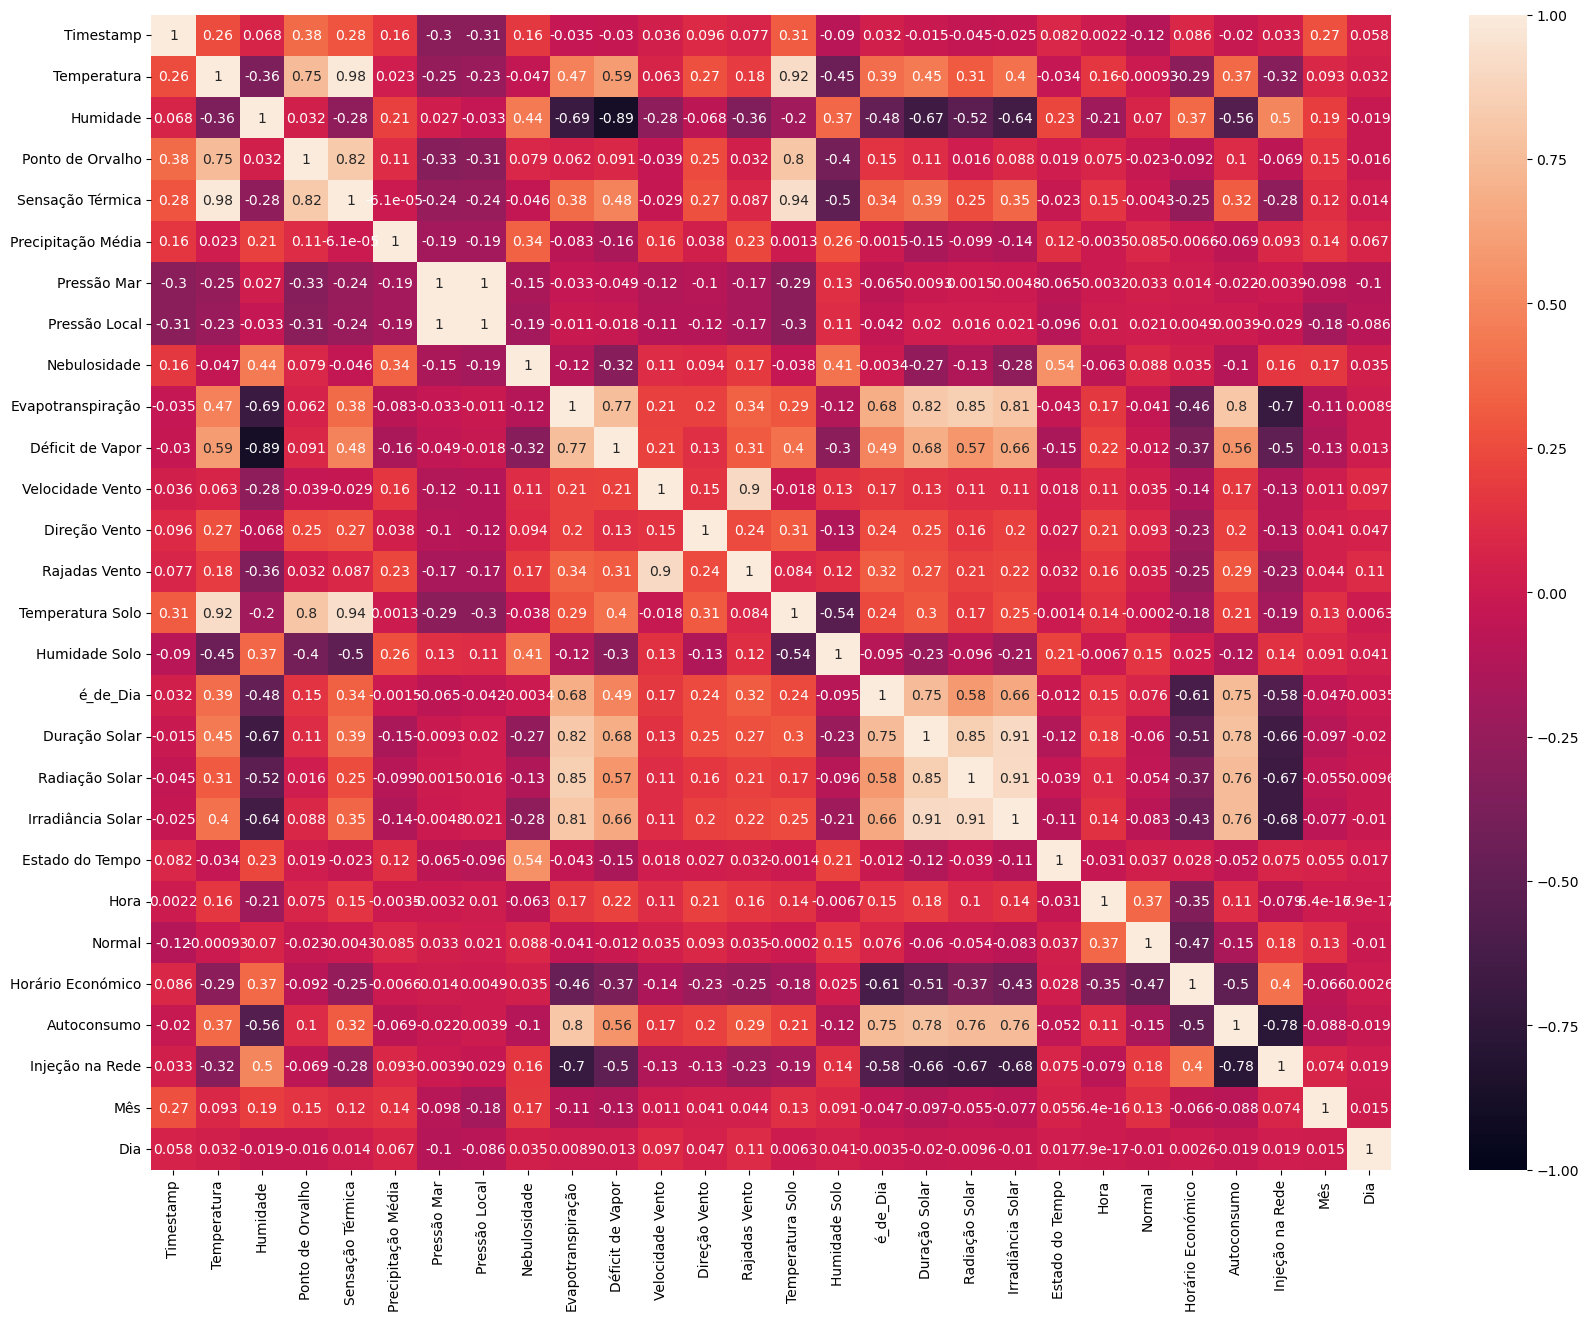

In [6572]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(e_m.corr(method = 'pearson'),vmin=-1,annot = True)

Drop das features muito correlacionadas

<Axes: >

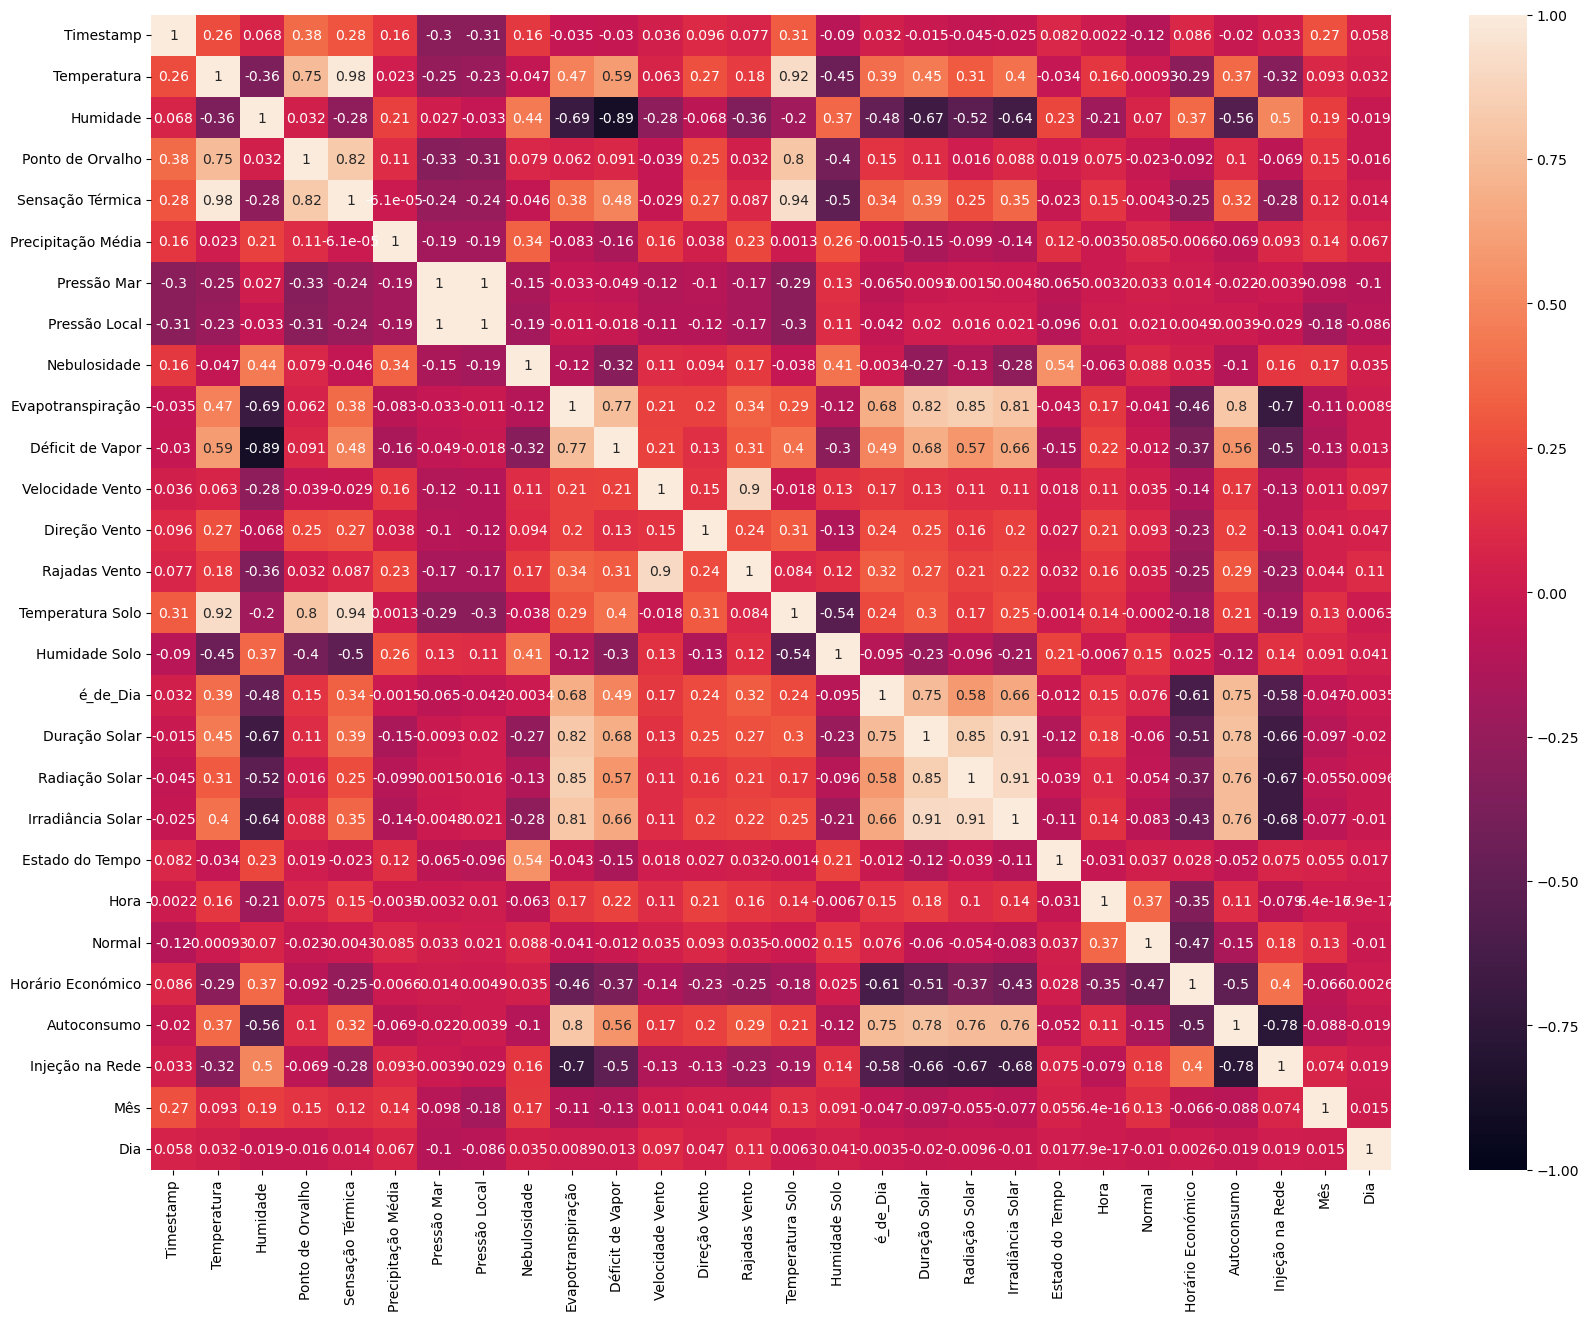

In [6573]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(e_m.corr(method = 'pearson'),vmin=-1,annot = True)

In [6574]:
e_m.drop(['Ponto de Orvalho','Timestamp','Humidade','Evapotranspiração','Déficit de Vapor','Radiação Solar','é_de_Dia','Irradiância Solar','Duração Solar','Temperatura Solo','Sensação Térmica'], axis=1, inplace=True)
teste.drop(['Ponto de Orvalho','Timestamp','Humidade','Evapotranspiração','Déficit de Vapor','Radiação Solar','é_de_Dia','Irradiância Solar','Duração Solar','Temperatura Solo','Sensação Térmica'], axis=1, inplace=True)

<Axes: >

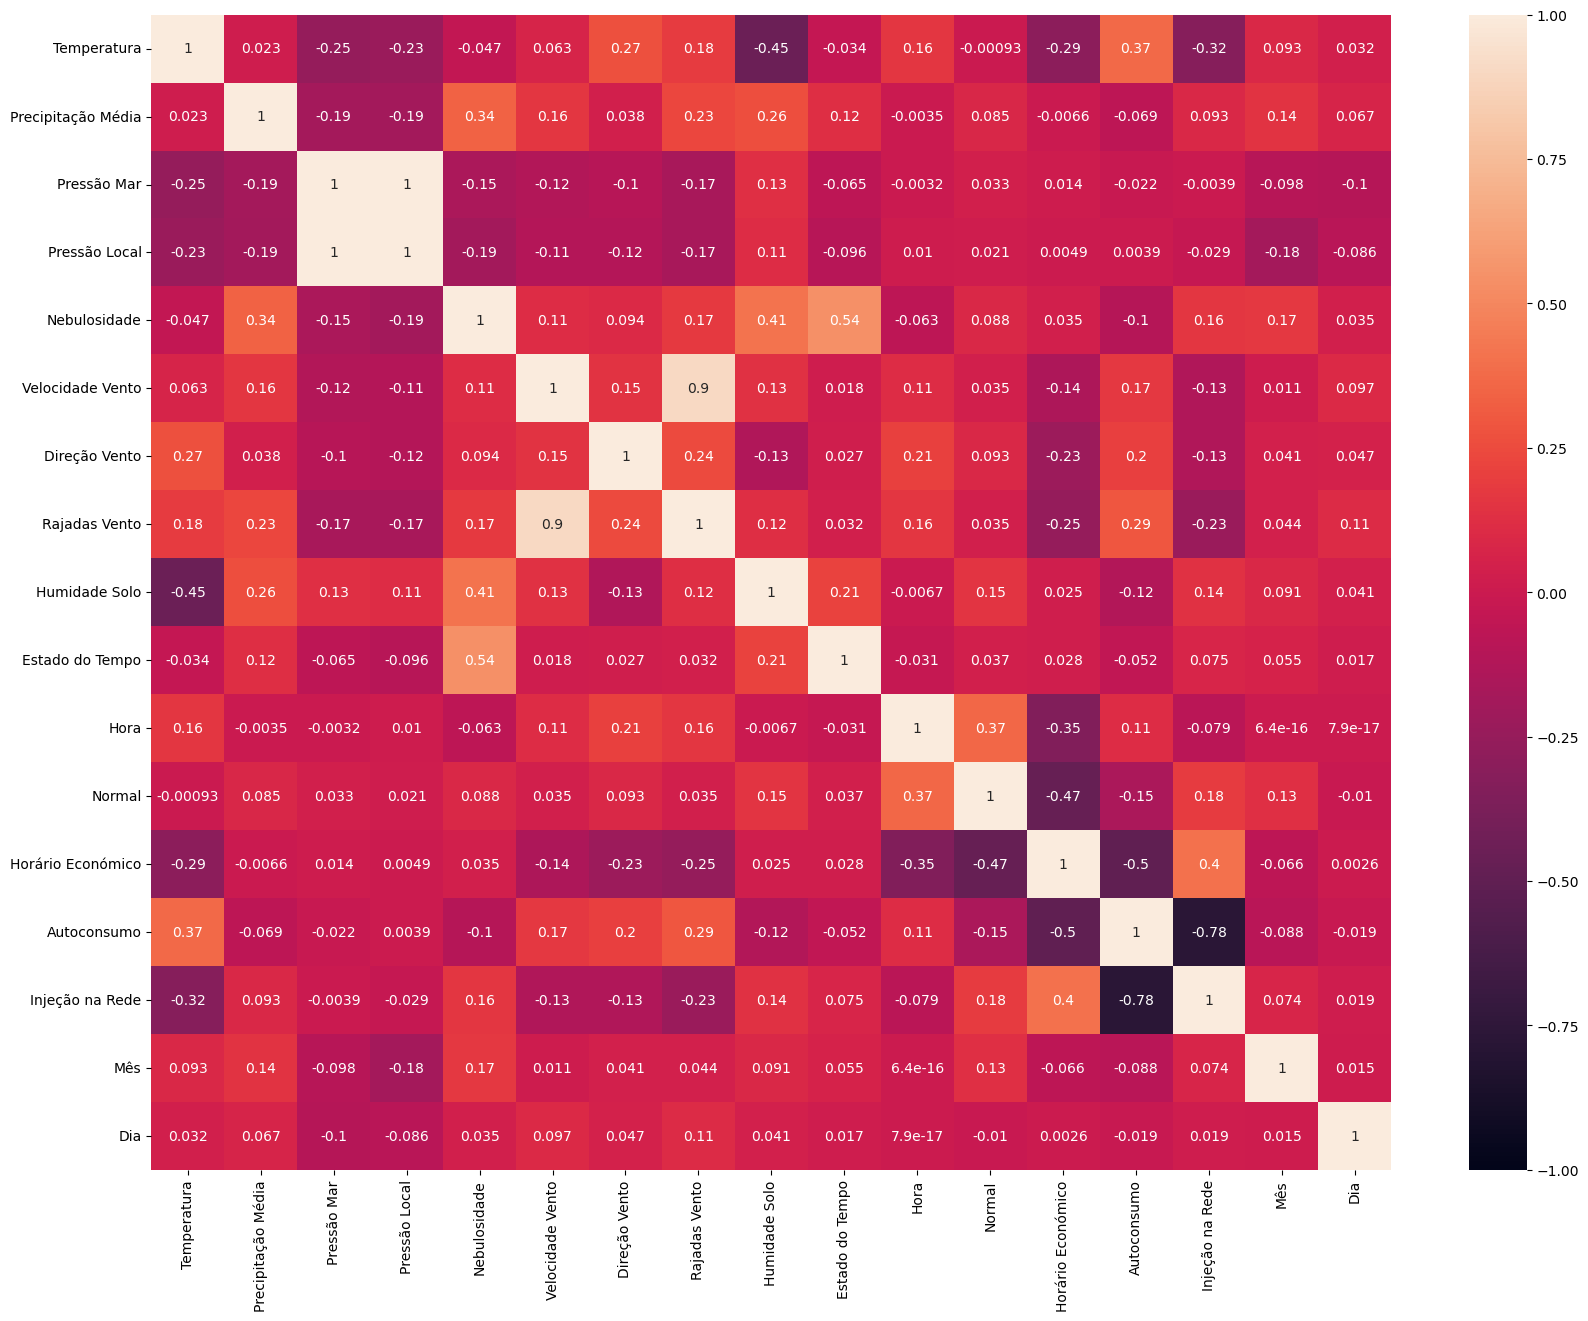

In [6575]:
fig = plt.figure(figsize = (20,15))
sns.heatmap(e_m.corr(method = 'pearson'),vmin=-1,annot = True)

## Modelos

In [6576]:
X = e_m.drop(['Injeção na Rede'], axis=1)   # input features - tudo exceto o target
y = e_m['Injeção na Rede'].to_frame()       # target feature - Injeção na Rede

In [6577]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

### XGBoost

#### Stratified Cross Validation 

In [6578]:
#from skearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold

In [6579]:
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)

#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2023)

#### Balanceamento de Classes

In [6580]:
from sklearn.utils import compute_class_weight

In [6581]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [6582]:
yTrain = y_train.values.flatten()
unique_classes = np.unique(yTrain)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=yTrain)
class_weight_dict = dict(zip(unique_classes, class_weights))
print(class_weight_dict)

{0: 1.9846846846846846, 1: 5.1683284457478, 2: 1.9936651583710407, 3: 3.596734693877551, 4: 0.28384602995651476}


In [6583]:
# Set class weights in DMatrix
dtrain.set_weight([class_weight_dict[label] for label in yTrain])

#### Undersampling e Oversampling

In [6584]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [6585]:
# Create an imputer instance
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on your data
X_train_imputed = imputer.fit_transform(X_train)

In [6586]:
# Create a pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=2023)),
])

In [6587]:
# Fit and transform the training data
#X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_imputed, y_train)

#### Definir hiperparêmetros

In [6588]:
param_grid = {
    'learning_rate': [0.01,0.02],       # diminuir o learning_rate reduz overfitting        default=0.3
    'n_estimators': [1000],             #                                                   default=100
    'max_depth': [3,4],                 # diminuir o max_depth reduz overfitting            default=6
    'min_child_weight': [3,5],          # aumentar o min_child_weight reduz overfitting     default=1
    'subsample': [0.5,0.6],             # diminuir o subsample reduz overfitting            default=1
    'colsample_bytree': [0.4,0.5],      # diminuir o colsample_bytree reduz overfitting     default=1
    'gamma': [0.1],                     # aumentar o gamma reduz overfitting                default=0
    'lambda': [1.5],                    # aumentar o lambda reduz overfitting               default=1
    'alpha': [0.5]                      # aumentar o alpha reduz overfitting                default=0
}

In [6589]:
bst = xgb.XGBClassifier(objective='multi:softmax', random_state = 2023)

In [6590]:
from sklearn.metrics import log_loss, make_scorer
#scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

In [6591]:
# Use GridSearchCV para encontrar os melhores hiperparâmetros   
grid_search = GridSearchCV(bst, param_grid,cv=10, scoring='accuracy')

grid_search.fit(X_train, y_train)
#grid_search.fit(X_train, y_train,sample_weight=dtrain.get_weight())
#grid_search.fit(X_train_resampled, y_train_resampled)

# Obtenha os melhores hiperparâmetros e o modelo ajustado
best_params = grid_search.best_params_

print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'alpha': 0.5, 'colsample_bytree': 0.5, 'gamma': 0.1, 'lambda': 1.5, 'learning_rate': 0.02, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 1000, 'subsample': 0.6}


#### Training

In [6595]:
# create model instance
bst = xgb.XGBClassifier(**best_params, objective='multi:softmax',eval_metric=["merror", "mlogloss"],early_stopping_rounds=50, random_state=2023)

# fit model
eval_set = [(X_train, y_train), (X_test, y_test)]

# Implement Early Stopping
bst.fit(X_train, y_train, eval_set=eval_set,verbose=False)

#bst.fit(X_train, y_train, sample_weight=dtrain.get_weight())
#bst.fit(X_train_resampled, y_train_resampled)

# make predictions
predictions_xgb = bst.predict(X_test)

In [6596]:
from sklearn.model_selection import StratifiedKFold

#kfold = StratifiedKFold(n_splits=10)
#results = cross_val_score(bst, X_train, y_train, cv=kfold)
#print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [6597]:
# Avalia o overfit - se o f1 score for menor que a accuracy
#f1_scores = cross_val_score(bst, X_train, y_train, scoring='f1_micro')
#print(f'F1-score: {f1_scores.mean():.2f} +/- {f1_scores.std():.2f}')

In [6598]:
print('Accuracy: ',accuracy_score(y_test, predictions_xgb))                   
print('Precision: ',precision_score(y_test, predictions_xgb, average='micro')) 
print('Recall: ',recall_score(y_test, predictions_xgb, average='micro')) 

# If the training score is higher than the test score, the model may be overfitting
predictions_train = bst.predict(X_train)
print('\nTraining Accuracy: ',accuracy_score(y_train, predictions_train))  

Accuracy:  0.8865698729582577
Precision:  0.8865698729582577
Recall:  0.8865698729582577

Training Accuracy:  0.9513163867453472


Epochs:  984


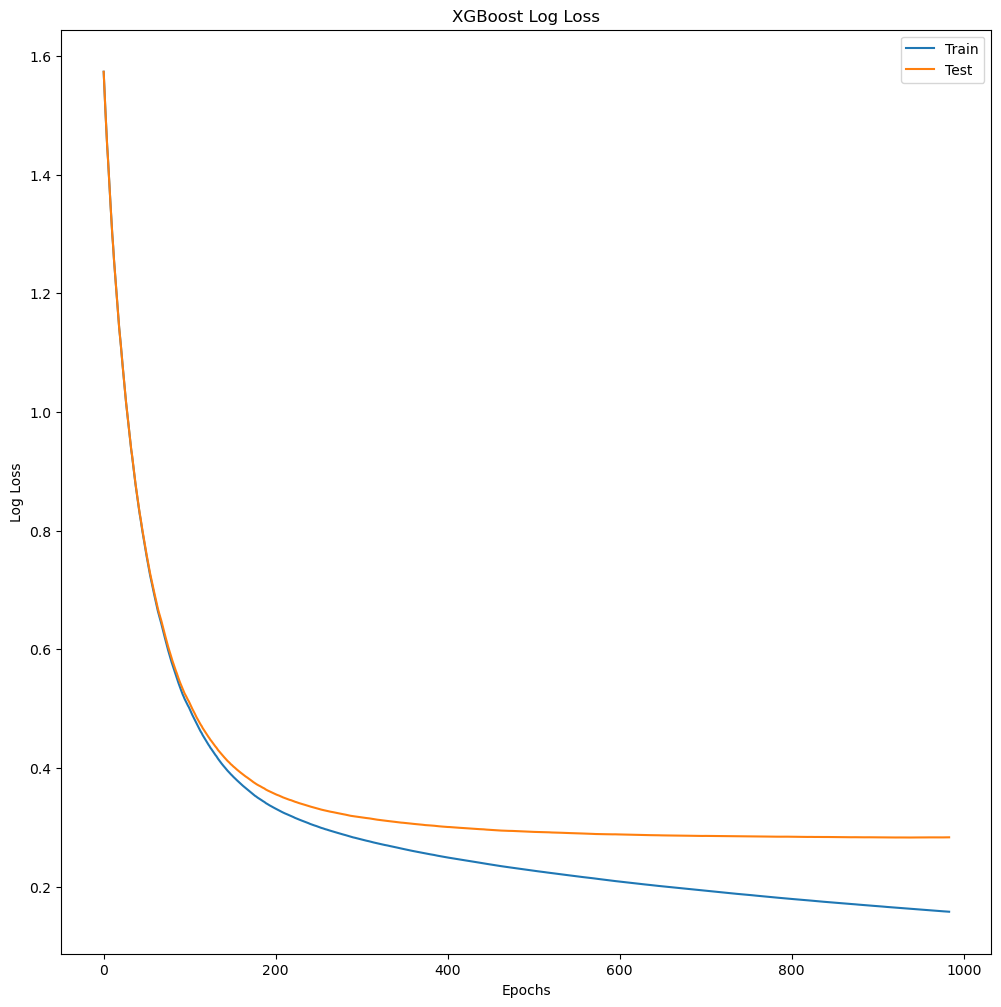

In [6599]:
# plot log loss
from matplotlib import pyplot

results = bst.evals_result()
epochs = len(results["validation_0"]["merror"])
x_axis = range(0, epochs)
print('Epochs: ',epochs)

fig, ax = pyplot.subplots(figsize=(12,12))
ax.plot(x_axis, results["validation_0"]["mlogloss"], label="Train")
ax.plot(x_axis, results["validation_1"]["mlogloss"], label="Test")
ax.legend()
pyplot.ylabel("Log Loss")
pyplot.xlabel("Epochs")
pyplot.title("XGBoost Log Loss")
pyplot.show()

#### Feature Importance

In [6601]:
importances = bst.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

               Feature  Importance
12   Horário Económico    0.283086
13         Autoconsumo    0.207894
11              Normal    0.115517
10                Hora    0.098329
4         Nebulosidade    0.040726
0          Temperatura    0.037344
9      Estado do Tempo    0.026262
14                 Mês    0.025572
8        Humidade Solo    0.025064
1   Precipitação Média    0.024697
6        Direção Vento    0.020695
7        Rajadas Vento    0.020524
5     Velocidade Vento    0.019227
2          Pressão Mar    0.018986
3        Pressão Local    0.018754
15                 Dia    0.017323


In [6602]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       215
           1       0.38      0.16      0.23        91
           2       0.62      0.61      0.61       214
           3       0.80      0.84      0.82       116
           4       0.96      0.99      0.97      1568

    accuracy                           0.89      2204
   macro avg       0.70      0.67      0.68      2204
weighted avg       0.87      0.89      0.88      2204



# Guardar Submissão

In [6603]:
# Fazer previsão com o BST
predictions = bst.predict(teste)

# Adicionar header
submission = pd.DataFrame(predictions, columns = ["Injeção na Rede"]).head(2256)
submission.index.name = 'RowId'
submission.index += 1
submission.rename(columns={'Injeção na Rede': 'Result'}, inplace=True)

# Trocar para valores categóricos
submission['Result'] = submission['Result'].replace({4:'None', 1:'Low', 2:'Medium', 0:'High', 3:'Very_High'})

#Passar para um ficheiro CSV
submission.to_csv('submission_xgb4.csv', index=True, header=True)